# Analysis of PolyaClassifier site definition for *A. thaliana*

**Purpose**: To identify 5mer motifs important to cleavage site definition in *A. thaliana* through a systematic mutation approach.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
from paper_utilities import motifs

In [5]:
species   = 'arabidopsis_thaliana'
modeltype = 'polyaclassifier'
config    = 'polyaclassifier_bagging3_kmers-5'
kmer      = 5


In [6]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyaclassifier_motif_importance_atha_5mers')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


In [7]:
## Load model configuration information

with open(os.path.join(RESOURCES, 'polyaclassifier_configurations.pickle'), mode = 'rb') as handle:
    configurations = pickle.load(handle)

gold_sites = configurations[species][config]['golden_lines']
print("\nNumber of golden sites:", gold_sites)

mot_dis_dir = os.path.join(PROJECT, species, 'analysis', 'motif_analysis', 'motif_disruption', config)
print("\nDirectory containing motif disruption results:", mot_dis_dir)



Number of golden sites: 9358

Directory containing motif disruption results: /projects/b1080/eks/polyadenylation/yeast/arabidopsis_thaliana/analysis/motif_analysis/motif_disruption/polyaclassifier_bagging3_kmers-5


In [8]:
## Load motif family definitions for S. cerevisiae

atha_definitions = {'patterns' : {}}

# By pattern
for kmer in [4,5,6]:
    with open(os.path.join(RESOURCES, f'motif_definitions.atha.{kmer}mers.patterns.pickle'), mode = 'rb') as handle:
        atha_definitions['patterns'][kmer] = pickle.load(handle)


In [9]:
with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.significant_motifs.pickle'), mode = 'rb') as handle:
    significant_motifs = pickle.load(handle)
    
sigmots = significant_motifs[species][modeltype][config]
print(f"Significant motifs = {len(sigmots)}")


Significant motifs = 72


# ANALYSIS

In [10]:
family_cmap = {
    'A-rich'          : '#2278b5', 
    'T-rich'          : '#2fa148', 
    'TGTA-containing' : '#fcb316', 
    'Other'           : '#f7f8f8',
}

## Top individual motifs in each region

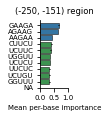

    motif  frequency     score   conf_lo   conf_hi  family  error_lo
27  GAAGA       3178  0.652397  0.664217  0.640577  A-rich  0.011820
12  AGAAG       2884  0.635217  0.647762  0.622672  A-rich  0.012545
7   AAGAA       3255  0.413433  0.425875  0.400991  A-rich  0.012442
22  CUUCU       2042  0.396740  0.411947  0.381532  T-rich  0.015207
42  UCUUC       2015  0.375606  0.389437  0.361776  T-rich  0.013830
45  UGGUU       2106  0.348055  0.364673  0.331437  T-rich  0.016618
40  UCUCU       2067  0.345218  0.361421  0.329016  T-rich  0.016202
55  UUCUC       1790  0.325649  0.342886  0.308412  T-rich  0.017237
41  UCUGU       1331  0.318698  0.341193  0.296203  T-rich  0.022495
29  GGUUU       2071  0.317356  0.336256  0.298456  T-rich  0.018900
0.664216995833004


In [11]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][5]['family'], sigmots, 
                      (-250,-151), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,1), xtickint = 0.5, verbose = True
                     )


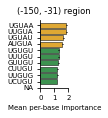

    motif  frequency     score   conf_lo   conf_hi           family  error_lo
46  UGUAA       3505  1.849750  1.888292  1.811207  TGTA-containing  0.038543
58  UUGUA       4053  1.846882  1.881015  1.812748  TGTA-containing  0.034133
47  UGUAU       3427  1.650019  1.684414  1.615625  TGTA-containing  0.034395
16  AUGUA       2566  1.572760  1.616707  1.528812  TGTA-containing  0.043947
48  UGUGU       3651  1.323742  1.345249  1.302236           T-rich  0.021507
67  UUUGU       6443  1.303459  1.322636  1.284283           T-rich  0.019177
32  GUUGU       3173  1.300059  1.328240  1.271878           T-rich  0.028181
23  CUUGU       3243  1.231159  1.257924  1.204394           T-rich  0.026765
59  UUGUG       3664  1.212125  1.234065  1.190185           T-rich  0.021940
41  UCUGU       2932  1.188001  1.215385  1.160618           T-rich  0.027383
1.8882923182461513


In [12]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][5]['family'], sigmots, 
                      (-150,-31), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,2), xtickint = 1, verbose = True
                     )


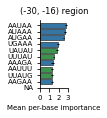

    motif  frequency     score   conf_lo   conf_hi  family  error_lo
8   AAUAA       1130  2.776117  2.868361  2.683872  A-rich  0.092244
14  AUAAA        990  2.707995  2.809179  2.606810  A-rich  0.101184
15  AUGAA        675  2.533927  2.629321  2.438533  A-rich  0.095394
44  UGAAA        565  1.916150  2.022056  1.810245  A-rich  0.105906
37  UAUAU        781  1.825571  1.896640  1.754502  T-rich  0.071069
61  UUUAU        968  1.461853  1.536384  1.387322  T-rich  0.074531
5   AAAGA        312  1.363858  1.507112  1.220604  A-rich  0.143254
9   AAUUU        735  1.314361  1.386376  1.242347  T-rich  0.072014
52  UUAUG        600  1.284104  1.359191  1.209018  T-rich  0.075087
7   AAGAA        390  1.283344  1.392743  1.173946  A-rich  0.109399
2.8683609399181447


In [13]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][5]['family'], sigmots, 
                      (-30,-16), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )


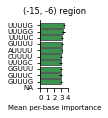

    motif  frequency     score   conf_lo   conf_hi  family  error_lo
70  UUUUG       1264  3.405813  3.523190  3.288436  T-rich  0.117377
66  UUUGG        712  3.315640  3.467262  3.164019  T-rich  0.151621
69  UUUUC        826  3.082316  3.225289  2.939344  T-rich  0.142973
36  GUUUU       1046  3.076760  3.197741  2.955778  T-rich  0.120982
19  AUUUU       1048  3.039594  3.154927  2.924262  T-rich  0.115333
25  CUUUU        834  2.958894  3.096035  2.821754  T-rich  0.137140
65  UUUGC        363  2.953045  3.167876  2.738214  T-rich  0.214831
29  GGUUU        512  2.950724  3.103992  2.797455  T-rich  0.153269
34  GUUUC        472  2.924533  3.109525  2.739540  T-rich  0.184992
35  GUUUG        533  2.912149  3.065002  2.759297  T-rich  0.152852
3.5231898188833433


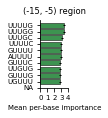

    motif  frequency     score   conf_lo   conf_hi  family  error_lo
70  UUUUG       1320  3.364828  3.478529  3.251127  T-rich  0.113701
66  UUUGG        773  3.359681  3.501772  3.217589  T-rich  0.142091
65  UUUGC        445  3.101437  3.286747  2.916128  T-rich  0.185309
69  UUUUC        885  3.023482  3.159650  2.887314  T-rich  0.136168
36  GUUUU       1082  2.994050  3.114561  2.873540  T-rich  0.120510
19  AUUUU       1086  2.940552  3.056127  2.824977  T-rich  0.115575
34  GUUUC        490  2.848698  3.031459  2.665938  T-rich  0.182760
59  UUGUG        503  2.824407  2.977688  2.671126  T-rich  0.153281
35  GUUUG        555  2.814178  2.967465  2.660892  T-rich  0.153287
51  UGUUU       1080  2.809767  2.923560  2.695975  T-rich  0.113793
3.5017719764005903


In [14]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][5]['family'], sigmots, 
                      (-15,-6), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,4), xtickint = 1, verbose = True
                     )

motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][5]['family'], sigmots, 
                      (-15,-5), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,4), xtickint = 1, verbose = True
                     )


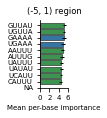

    motif  frequency     score   conf_lo   conf_hi  family  error_lo
31  GUUAU        239  5.208258  5.509295  4.907221  T-rich  0.301037
49  UGUUA        247  5.197564  5.447396  4.947732  T-rich  0.249832
26  GAAAA        109  5.131523  5.543226  4.719820  A-rich  0.411703
44  UGAAA        146  4.889495  5.289162  4.489828  A-rich  0.399667
9   AAUUU        281  4.889306  5.250479  4.528133  T-rich  0.361173
18  AUUUG        223  4.762783  5.156237  4.369330  T-rich  0.393454
38  UAUUU        454  4.624433  4.863323  4.385542  T-rich  0.238891
37  UAUAU        341  4.605252  4.869979  4.340525  T-rich  0.264727
39  UCAUU        266  4.529054  4.817101  4.241006  T-rich  0.288048
21  CAUUU        261  4.440940  4.767879  4.114000  T-rich  0.326939
5.54322615918979


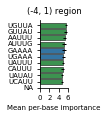

    motif  frequency     score   conf_lo   conf_hi  family  error_lo
49  UGUUA        232  5.529099  5.726548  5.331651  T-rich  0.197449
31  GUUAU        227  5.512559  5.773285  5.251832  T-rich  0.260726
9   AAUUU        257  5.360171  5.699420  5.020922  T-rich  0.339249
18  AUUUG        202  5.207419  5.587233  4.827606  T-rich  0.379814
26  GAAAA        109  5.131523  5.543226  4.719820  A-rich  0.411703
44  UGAAA        143  5.041177  5.409559  4.672795  A-rich  0.368382
38  UAUUU        429  4.929597  5.158964  4.700229  T-rich  0.229368
21  CAUUU        239  4.901045  5.198371  4.603719  T-rich  0.297326
37  UAUAU        325  4.768411  5.030050  4.506771  T-rich  0.261639
39  UCAUU        253  4.741833  5.022588  4.461078  T-rich  0.280755
5.773284665513735


In [15]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][5]['family'], sigmots, 
                      (-5,1), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,6), xtickint = 2, verbose = True
                     )

motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][5]['family'], sigmots, 
                      (-4,1), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,6), xtickint = 2, verbose = True
                     )



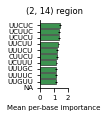

    motif  frequency     score   conf_lo   conf_hi  family  error_lo
55  UUCUC        473  1.428139  1.500884  1.355394  T-rich  0.072745
42  UCUUC        454  1.366166  1.423884  1.308448  T-rich  0.057718
40  UCUCU        528  1.347776  1.406857  1.288696  T-rich  0.059081
56  UUCUU        894  1.303057  1.354322  1.251791  T-rich  0.051265
63  UUUCU        846  1.208735  1.261335  1.156135  T-rich  0.052600
22  CUUCU        401  1.192538  1.251748  1.133329  T-rich  0.059210
43  UCUUU        922  1.175627  1.224507  1.126746  T-rich  0.048881
65  UUUGC        371  1.140975  1.222235  1.059715  T-rich  0.081260
69  UUUUC        730  1.135843  1.184953  1.086733  T-rich  0.049110
60  UUGUU        995  1.129780  1.182059  1.077501  T-rich  0.052279
1.5008840833519559


In [16]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][5]['family'], sigmots, 
                      (2,14), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,2), xtickint = 1, verbose = True
                     )


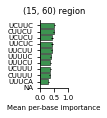

    motif  frequency     score   conf_lo   conf_hi  family  error_lo
42  UCUUC        903  0.511025  0.534085  0.487965  T-rich  0.023060
22  CUUCU        822  0.487563  0.517386  0.457740  T-rich  0.029823
40  UCUCU       1012  0.437550  0.462012  0.413089  T-rich  0.024461
55  UUCUC        914  0.436755  0.464306  0.409203  T-rich  0.027551
56  UUCUU       1700  0.424615  0.443882  0.405347  T-rich  0.019267
69  UUUUC       1567  0.380881  0.402146  0.359615  T-rich  0.021265
63  UUUCU       1688  0.377227  0.397409  0.357045  T-rich  0.020182
43  UCUUU       1716  0.371924  0.390877  0.352971  T-rich  0.018953
25  CUUUU       1622  0.348589  0.368289  0.328889  T-rich  0.019700
62  UUUCA       1368  0.297264  0.316652  0.277877  T-rich  0.019387
0.534085167143643


In [17]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][5]['family'], sigmots, 
                      (15,60), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,1), xtickint = 0.5, verbose = True
                     )
